In [ ]:
# Check GPU type
!nvidia-smi

Wed Aug 24 18:13:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    31W /  70W |   8962MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### KERAS TRANSFER LEARNING WITH LEAF PROJECT

In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change current directory to Google Drive
%cd /content/drive/MyDrive/

/content/drive/MyDrive


### Dataset operations

In [ ]:
# Install zip and unzip
!apt-get install -y zip unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!mkdir -p /root/WORKSPACE

In [ ]:
# Copy Zips into Workspace
!cp /content/drive/MyDrive/Datasets/combined_train.zip /root/WORKSPACE
!cp /content/drive/MyDrive/Datasets/combined_valid.zip /root/WORKSPACE

In [ ]:
!unzip /root/WORKSPACE/combined_train.zip
!unzip /root/WORKSPACE/combined_valid.zip

Streaming output truncated to the last 5000 lines.
  inflating: root/WORKSPACE/tomamto_op/combined_train/mosaic_virus1484_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/leaf_mold985_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/spider_mite994_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/mosaic_virus614_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/late_blight1510_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/late_blight691_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/leaf_mold1292_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/curl_virus640_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/bacterial_spot1537_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/early_blight845_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/spider_mite778_crp_strc.jpg  
  inflating: root/WO

In [ ]:
!mkdir -p /root/WORKSPACE/whole_dataset
!mv -v root/WORKSPACE/tomamto_op/combined_train/* /root/WORKSPACE/whole_dataset/
!mv -v root/WORKSPACE/tomamto_op/combined_valid/* /root/WORKSPACE/whole_dataset/

Streaming output truncated to the last 5000 lines.
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight28_crp_strc.jpg' -> '/root/WORKSPACE/whole_dataset/late_blight28_crp_strc.jpg'
removed 'root/WORKSPACE/tomamto_op/combined_valid/late_blight28_crp_strc.jpg'
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight290_crp_strc.jpg' -> '/root/WORKSPACE/whole_dataset/late_blight290_crp_strc.jpg'
removed 'root/WORKSPACE/tomamto_op/combined_valid/late_blight290_crp_strc.jpg'
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight291_crp_strc.jpg' -> '/root/WORKSPACE/whole_dataset/late_blight291_crp_strc.jpg'
removed 'root/WORKSPACE/tomamto_op/combined_valid/late_blight291_crp_strc.jpg'
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight292_crp_strc.jpg' -> '/root/WORKSPACE/whole_dataset/late_blight292_crp_strc.jpg'
removed 'root/WORKSPACE/tomamto_op/combined_valid/late_blight292_crp_strc.jpg'
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight293_crp_strc

In [ ]:
# Rezip
%cd /root/WORKSPACE/whole_dataset/
!zip -r /root/whole_dataset.zip . *
%cd -

Streaming output truncated to the last 5000 lines.
  adding: mosaic_virus990_crp_strc.jpg (deflated 1%)
  adding: early_blight1118_crp_strc.jpg (deflated 3%)
  adding: curl_virus327_crp_strc.jpg (deflated 2%)
  adding: early_blight358_crp_strc.jpg (deflated 2%)
  adding: septoeia_leaf_spot1579_crp_strc.jpg (deflated 1%)
  adding: early_blight770_crp_strc.jpg (deflated 3%)
  adding: septoeia_leaf_spot819_crp_strc.jpg (deflated 2%)
  adding: late_blight285_crp_strc.jpg (deflated 3%)
  adding: early_blight692_crp_strc.jpg (deflated 2%)
  adding: mosaic_virus612_crp_strc.jpg (deflated 2%)
  adding: healty880_crp_strc.jpg (deflated 2%)
  adding: leaf_mold1300_crp_strc.jpg (deflated 5%)
  adding: target_spot655_crp_strc.jpg (deflated 2%)
  adding: bacterial_spot547_crp_strc.jpg (deflated 3%)
  adding: leaf_mold1428_crp_strc.jpg (deflated 4%)
  adding: late_blight214_crp_strc.jpg (deflated 2%)
  adding: curl_virus956_crp_strc.jpg (deflated 4%)
  adding: early_blight72_crp_strc.jpg (deflated 2

In [ ]:
!cp /root/whole_dataset.zip Datasets/

In [ ]:
!mv /Datasets/whole_dataset.zip /Datasets/test/xd.zip

mv: cannot stat '/Datasets/whole_dataset.zip': No such file or directory


In [ ]:
%cd Datasets

/content/drive/MyDrive/Datasets


In [ ]:
!ls

combined_train.zip  combined_valid.zip	tomato.zip  whole_dataset.zip


### ResNet50 Transfer Learning

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

In [ ]:
dataset_url = "https://transfer.sh/YwG6Wf/tomato_dataset.tgz"

In [ ]:
data_dir = tf.keras.utils.get_file('tomato_dataset', origin=dataset_url, untar=True)

231702528/231691341 [==============================] - 49s 0us/step


In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/tomato_dataset')

In [ ]:
# Delete Spotlight Indecies
%cd /root/.keras/datasets/tomato_dataset/
!find . -name '._*' -type f -delete
%cd -

In [ ]:
# Delete Spotlight Indecies
%cd /root/.keras/datasets/tomato_dataset/
!find . -name '.DS_*' -type f -delete
%cd -

In [ ]:
!ls -la /root/.keras/datasets/tomato_dataset/


In [ ]:
# Compress the cleaned dataset into tar.gz
%cd /root/.keras/datasets/tomato_dataset/
!tar -cvzf /root/tomato_dataset.tgz . *
%cd -

In [ ]:
!curl --upload-file /root/tomato_dataset.tgz https://transfer.sh/tomato_dataset.tgz




^C


In [ ]:
img_size = (256, 256)
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode="categorical",
  image_size=img_size,
  batch_size=batch_size)

Found 18748 files belonging to 10 classes.
Using 14999 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=img_size,
  batch_size=batch_size)

Found 18748 files belonging to 10 classes.
Using 3749 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bacterial_spot', 'curl_virus', 'early_blight', 'healty', 'late_blight', 'leaf_mold', 'mosaic_virus', 'septoria_leaf_spot', 'spider_mite', 'target_spot']


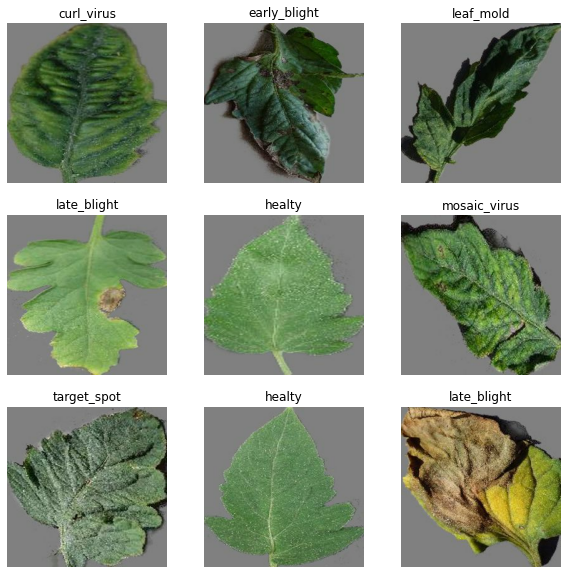

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = class_names[labels[i].numpy().tolist().index(1)]
        plt.title(title)
        plt.axis("off")

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=10,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
469/469 [==============================] - 92s 166ms/step - loss: 0.4850 - accuracy: 0.8345 - val_loss: 0.4061 - val_accuracy: 0.8664
Epoch 2/5
469/469 [==============================] - 78s 166ms/step - loss: 0.2282 - accuracy: 0.9227 - val_loss: 0.2595 - val_accuracy: 0.9133
Epoch 3/5
469/469 [==============================] - 78s 165ms/step - loss: 0.1418 - accuracy: 0.9509 - val_loss: 0.2297 - val_accuracy: 0.9234
Epoch 4/5
469/469 [==============================] - 77s 165ms/step - loss: 0.1011 - accuracy: 0.9661 - val_loss: 0.1844 - val_accuracy: 0.9395
Epoch 5/5
469/469 [==============================] - 78s 165ms/step - loss: 0.0805 - accuracy: 0.9707 - val_loss: 0.1851 - val_accuracy: 0.9411


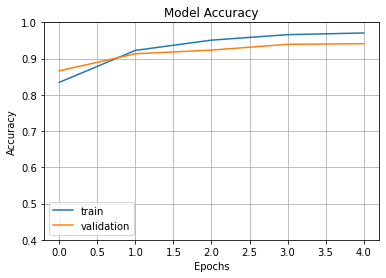

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
resnet_model.save('/root/resnet_model_five.h5')

In [ ]:
!ls -lh /root/

In [ ]:
import requests
from PIL import Image
from io import BytesIO

In [ ]:
# response = requests.get(r"https://image.shutterstock.com/image-photo/tomato-leaf-isolated-on-white-260nw-580281301.jpg")
# response = requests.get(r"https://extension.umaine.edu/ipm/wp-content/uploads/sites/44/2021/06/Early-Blight-on-Tomato-2_JimDill.jpg")
# url = r"http://ephytia.inra.fr/en/I/28271/ToLCNDV4"

url = r"https://blogs.cornell.edu/livegpath/files/2021/02/leaf_mold_tomato1x1200.jpg"
response = requests.get(url)

img = Image.open(BytesIO(response.content)).resize(img_size).convert('RGB')
img = np.expand_dims(img, axis=0)

In [ ]:
pred=resnet_model.predict(img)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is late_blight
